In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('drug200.csv')

In [4]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [12]:
print(df['Age'].isna().values.any())

False


In [80]:
print(df['BP'].isna().sum())

0


In [15]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['BP'] = le.fit_transform(df['BP'])
df['Cholesterol'] = le.fit_transform(df['Cholesterol'])

In [18]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,drugY
1,47,1,1,0,13.093,drugC
2,47,1,1,0,10.114,drugC
3,28,0,2,0,7.798,drugX
4,61,0,1,0,18.043,drugY
...,...,...,...,...,...,...
195,56,0,1,0,11.567,drugC
196,16,1,1,0,12.006,drugC
197,52,1,2,0,9.894,drugX
198,23,1,2,1,14.020,drugX


In [44]:
from sklearn.model_selection import train_test_split

X = df.drop('Drug', axis=1)
y = df['Drug']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state = 140)


In [45]:
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

In [81]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(criterion='gini')

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
dt

DecisionTreeClassifier()

In [83]:
ypred = dt.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, ypred)
acc = accuracy_score(y_test, ypred)
cr = classification_report(y_test, ypred)

In [85]:
cm

array([[10,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0],
       [ 0,  0,  7,  0,  0],
       [ 0,  0,  0, 24,  1],
       [ 0,  0,  0,  0, 35]], dtype=int64)

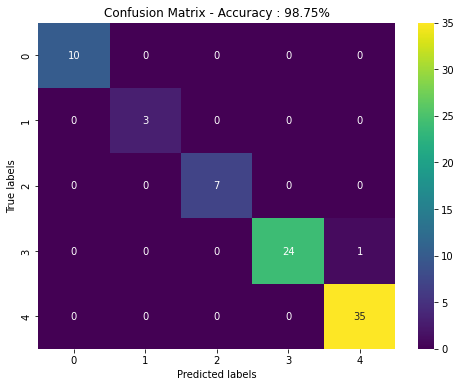

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))

sns.heatmap(cm, annot=True, fmt='d', cmap="viridis")
plt.title(f'Confusion Matrix - Accuracy : {acc*100}%')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.show()

In [87]:
acc
print(acc*100,"%")
print(f'{acc*100}%')

98.75 %
98.75%


In [88]:
print(cr)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         7
       drugX       1.00      0.96      0.98        25
       drugY       0.97      1.00      0.99        35

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [89]:
dt.feature_importances_

array([0.15593762, 0.        , 0.28113754, 0.09446222, 0.46846261])

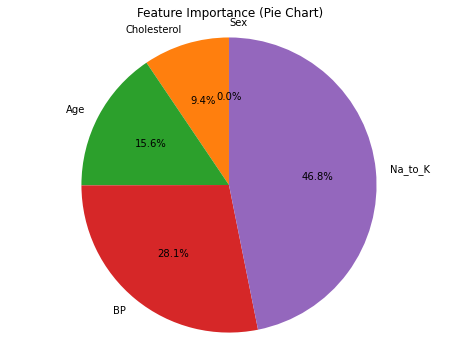

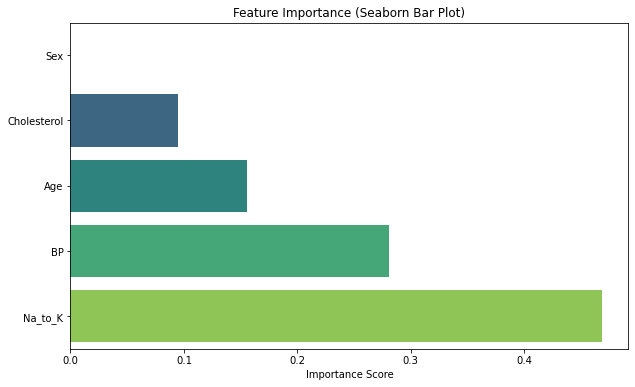

In [90]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with feature importance scores
feature_importance = pd.DataFrame({'dt': dt.feature_importances_}, index=X.columns)
feature_importance.sort_values('dt', ascending=True, inplace=True)
index = np.arange(len(feature_importance))

# Horizontal Bar Plot
# fig, ax = plt.subplots(figsize=(18, 8))
# rfc_feature = ax.barh(index, feature_importance['rfc'], color='purple', label='Random Forest')
# ax.set(yticks=index, yticklabels=feature_importance.index)
# ax.legend()
# plt.show()

# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(feature_importance['dt'], labels=feature_importance.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Ensure the pie chart is circular
plt.title('Feature Importance (Pie Chart)')
plt.show()

# Horizontal Bar Plot with Color Palette
plt.figure(figsize=(10, 6))
sns.barplot(x='dt', y=feature_importance.index, data=feature_importance, palette='viridis')
plt.title('Feature Importance (Seaborn Bar Plot)')
plt.xlabel('Importance Score')
# plt.tight_layout()
plt.show()

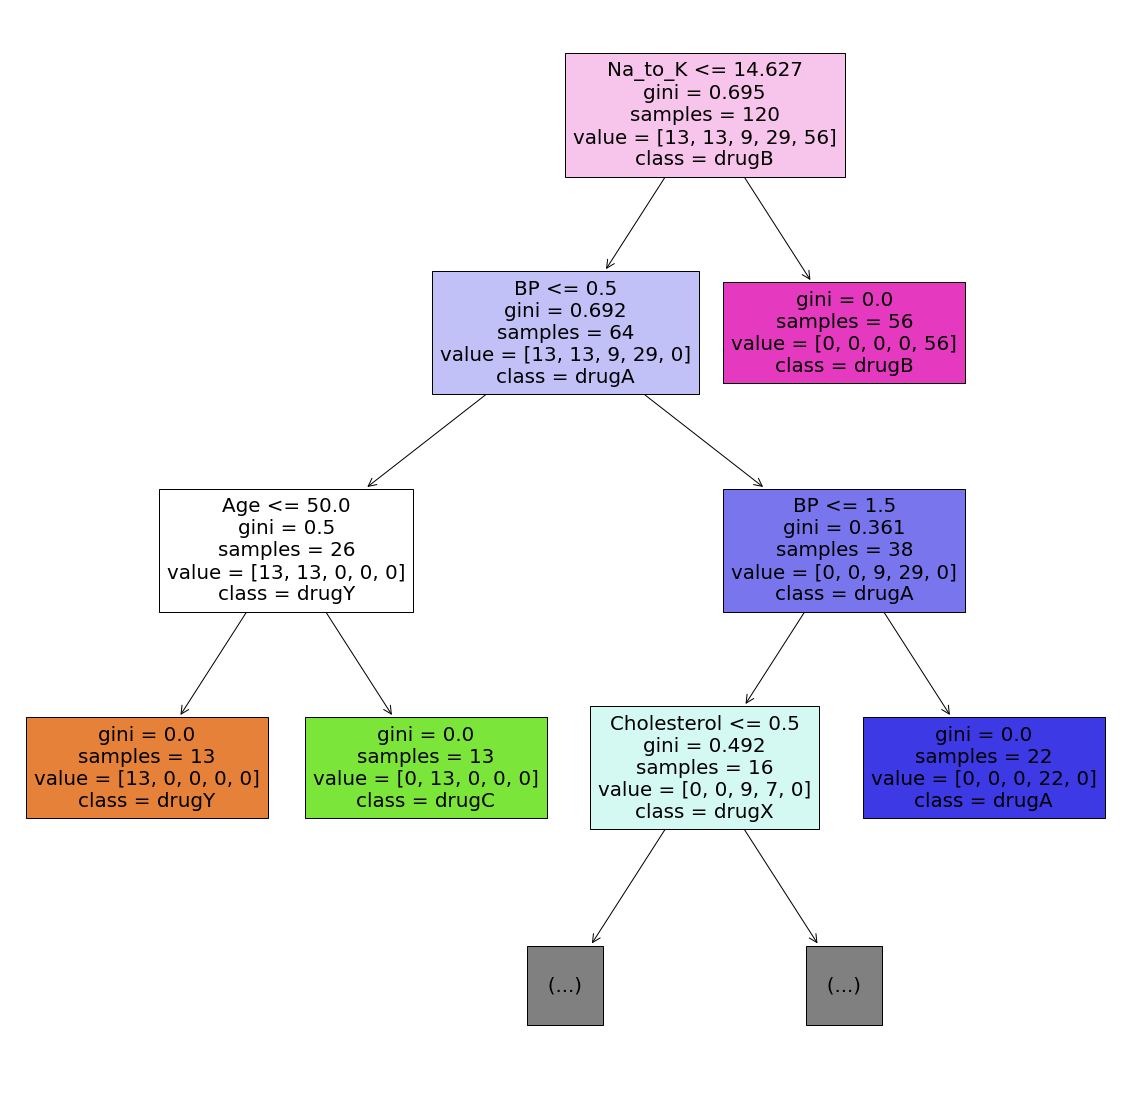

In [97]:
from sklearn.tree import plot_tree,export_text
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
plot_tree(
    dt, 
    feature_names=X.columns,  # Use the column names from your DataFrame as feature names
    class_names=y.unique(),   # Use unique values from your target variable as class names
    max_depth=3, 
    filled=True
)
plt.show()

In [92]:
# Hypertuning 

In [93]:
dt.tree_.max_depth

4

In [94]:
best_max_d = 0
best_validation_accuracy = 0

for max_d in range(1, 10):
    dt = DecisionTreeClassifier(max_depth=max_d, random_state=2)
    dt.fit(X_train, y_train)
    
    training_accuracy = dt.score(X_train, y_train)
    validation_accuracy = dt.score(X_test, y_test)
    
    print('The Training Accuracy for max_depth {} is: {}'.format(max_d, training_accuracy))
    print('The Validation Accuracy for max_depth {} is: {}'.format(max_d, validation_accuracy))
    print('')
    
    if validation_accuracy > best_validation_accuracy:
        best_max_d = max_d
        best_validation_accuracy = validation_accuracy

print("The best max_depth found is:", best_max_d)


The Training Accuracy for max_depth 1 is: 0.7083333333333334
The Validation Accuracy for max_depth 1 is: 0.7375

The Training Accuracy for max_depth 2 is: 0.8166666666666667
The Validation Accuracy for max_depth 2 is: 0.8625

The Training Accuracy for max_depth 3 is: 0.9416666666666667
The Validation Accuracy for max_depth 3 is: 0.8625

The Training Accuracy for max_depth 4 is: 1.0
The Validation Accuracy for max_depth 4 is: 0.9875

The Training Accuracy for max_depth 5 is: 1.0
The Validation Accuracy for max_depth 5 is: 0.9875

The Training Accuracy for max_depth 6 is: 1.0
The Validation Accuracy for max_depth 6 is: 0.9875

The Training Accuracy for max_depth 7 is: 1.0
The Validation Accuracy for max_depth 7 is: 0.9875

The Training Accuracy for max_depth 8 is: 1.0
The Validation Accuracy for max_depth 8 is: 0.9875

The Training Accuracy for max_depth 9 is: 1.0
The Validation Accuracy for max_depth 9 is: 0.9875

The best max_depth found is: 4


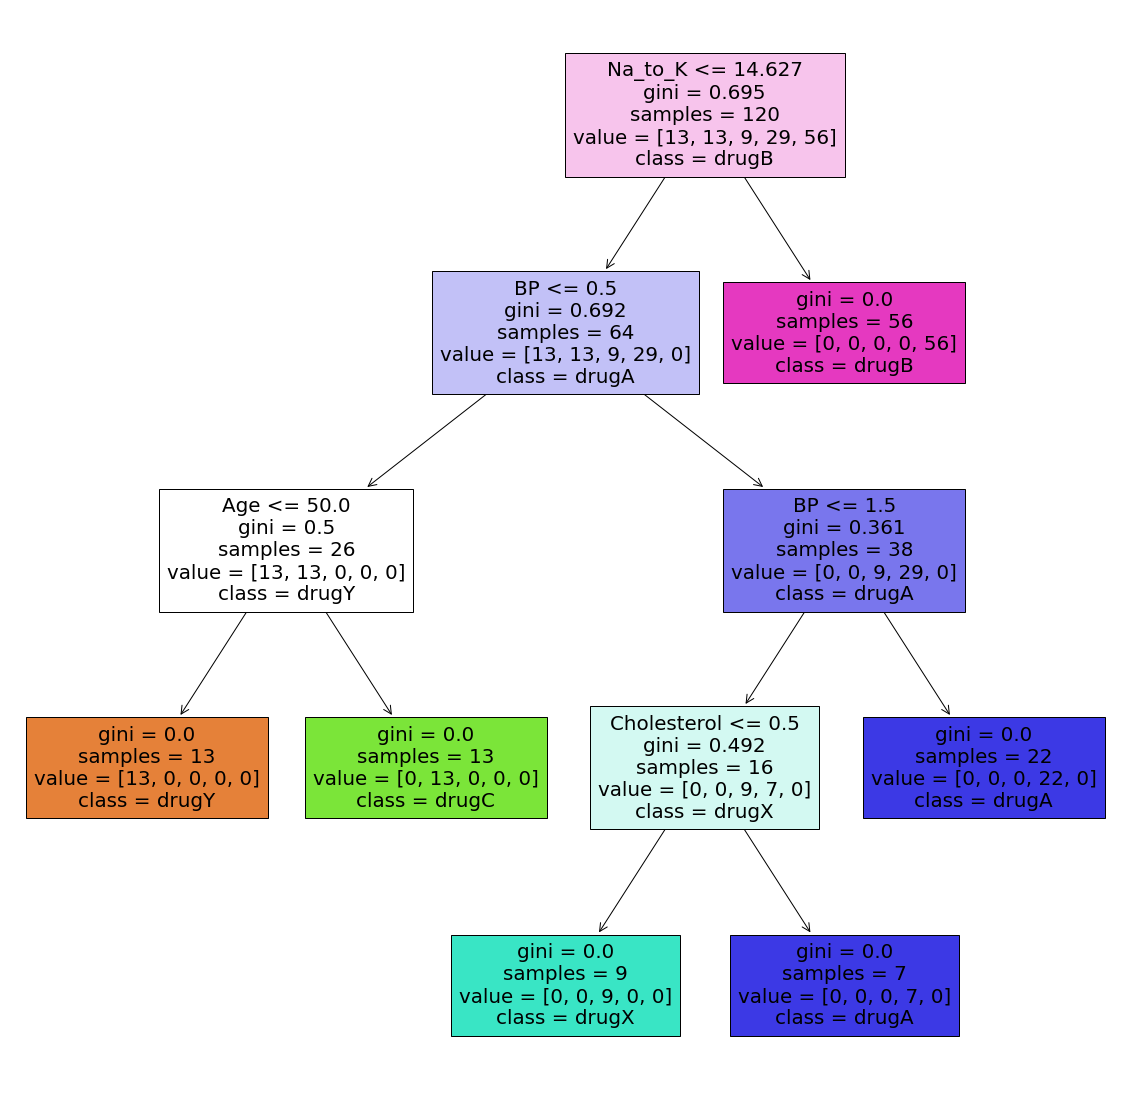

In [95]:
from sklearn.tree import plot_tree,export_text
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
plot_tree(
    dt, 
    feature_names=X.columns,  # Use the column names from your DataFrame as feature names
    class_names=y.unique(),   # Use unique values from your target variable as class names
    max_depth=4, 
    filled=True
)
plt.show()